In [126]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import cross_validation
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#scikit learn (tree drawing)
from sklearn import tree
from IPython.display import Image

#for plotting
import matplotlib.pyplot as plt
%matplotlib inline

#for saving
import pickle, os, pydotplus, random

print("All required modules are imported")

All required modules are imported


In [127]:
# get titanic & test csv files as a DataFrame
titanic = pd.read_csv("/Users/stephaniesauerhaft/Desktop/Kaggle/Titanic/train.csv")
titanic_test = pd.read_csv("/Users/stephaniesauerhaft/Desktop/Kaggle/Titanic/test.csv")

# preview the data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
## combine the two sets of data for cleaning
# need to add survival column to titanic_test and make it the seconf column
titanic_test["Survived"] = np.nan
cols = list(titanic_test)
cols.insert(1, cols.pop(cols.index('Survived')))

# use ix to reorder columns
titanic_test = titanic_test.ix[:, cols]
titanic_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [129]:
#combine two data frames 
#-- can now identify 'titanic' using all_data.ix['t'],'titanic_test = all_data.ix('tst')
all_data = pd.concat([titanic,titanic_test], keys=['t', 'tst'])
all_data.head()

PassengerId  Survived  Pclass  \
t 0            1       0.0       3   
  1            2       1.0       1   
  2            3       1.0       3   
  3            4       1.0       1   
  4            5       0.0       3   

                                                  Name     Sex   Age  SibSp  \
t 0                            Braund, Mr. Owen Harris    male  22.0      1   
  1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
  2                             Heikkinen, Miss. Laina  female  26.0      0   
  3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
  4                           Allen, Mr. William Henry    male  35.0      0   

     Parch            Ticket     Fare Cabin Embarked  
t 0      0         A/5 21171   7.2500   NaN        S  
  1      0          PC 17599  71.2833   C85        C  
  2      0  STON/O2. 3101282   7.9250   NaN        S  
  3      0            113803  53.1000  C123        S  
  4      0            373450   8.0500   NaN        S

In [130]:
# 1. get rid of where fare = nan
all_data["Fare"] = all_data["Fare"].fillna(all_data["Fare"].median())

# 2. Need to give all relevant values numerical equivalent 
#-- male = 0, female = 1
all_data.loc[all_data["Sex"] == "male", "Sex"] = 0
all_data.loc[all_data["Sex"] == "female", "Sex"] = 1
#-- Embarked: S = 0,C = 1, Q = 2 -- replace all empty embarked with S (most people embarked here)
all_data["Embarked"] = all_data["Embarked"].fillna("S")

all_data.loc[all_data["Embarked"] == "S", "Embarked"] = 0
all_data.loc[all_data["Embarked"] == "C", "Embarked"] = 1
all_data.loc[all_data["Embarked"] == "Q", "Embarked"] = 2

In [131]:
# 3. get median ages for each gender in each class for when 'Age' = nan
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = all_data[(all_data['Sex'] == i) & \
                              (all_data['Pclass'] == j+1)]['Age'].dropna().median()
median_ages

for i in range(0, 2):
    for j in range(0, 3):
        all_data.loc[ (all_data.Age.isnull()) & (all_data.Sex == i) & (all_data.Pclass == j+1),\
                'Age'] = median_ages[i,j]  

print(all_data.describe())  

       PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1309.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.261398     0.498854   
std     378.020061    0.486592     0.837836    13.218275     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    22.000000     0.000000   
50%     655.000000    0.000000     3.000000    26.000000     0.000000   
75%     982.000000    1.000000     3.000000    36.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1309.000000  
mean      0.385027    33.281086  
std       0.865560    51.741500  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200  


In [132]:
## add some new features that may provide insight

# create new family size feature
all_data["FamilySize"] = all_data["SibSp"] + all_data["Parch"]
all_data["NameLength"] = all_data["Name"].apply(lambda x: len(x))


In [133]:
import re

# A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one occurs.
titles = all_data["Name"].apply(get_title)
print(pd.value_counts(titles))

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2, "Dona":10}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything.
print(pd.value_counts(titles))

# Add in the title column.
all_data["Title"] = titles

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Ms            2
Mlle          2
Capt          1
Dona          1
Countess      1
Sir           1
Mme           1
Lady          1
Jonkheer      1
Don           1
Name: Name, dtype: int64
1     757
2     262
3     197
4      61
6       8
5       8
7       7
10      4
8       3
9       2
Name: Name, dtype: int64


In [134]:
titanic = all_data.ix['t']
titanic_test = all_data.ix['tst']
titanic_test = titanic_test.ix[:,titanic_test.columns != 'Survived']

titanic_1 = np.random.rand(len(titanic))<0.8
titanic_train = titanic[titanic_1]
titanic_validate = titanic[~titanic_1]
print(titanic_train.describe())
print(titanic_validate.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count    719.00000  719.000000  719.000000  719.000000  719.000000   
mean     448.03338    0.385257    2.321280   29.305869    0.531293   
std      259.09829    0.486995    0.835147   13.594838    1.150902   
min        1.00000    0.000000    1.000000    0.670000    0.000000   
25%      223.50000    0.000000    2.000000   22.000000    0.000000   
50%      452.00000    0.000000    3.000000   25.000000    0.000000   
75%      672.50000    1.000000    3.000000   36.000000    1.000000   
max      891.00000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  FamilySize  NameLength  
count  719.000000  719.000000  719.000000  719.000000  
mean     0.375522   32.299112    0.906815   26.972184  
std      0.793962   49.282202    1.654216    9.492076  
min      0.000000    0.000000    0.000000   12.000000  
25%      0.000000    7.895800    0.000000   20.000000  
50%      0.000000   14.400000    

In [135]:
# set response variable
response = 'Survived'

# set feature variables 
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','FamilySize','NameLength','Title']

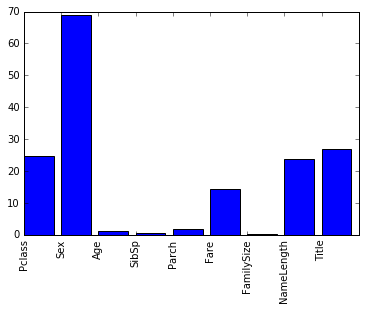

In [136]:
from sklearn.feature_selection import SelectKBest, f_classif
# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[features], titanic["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(features)), scores)
plt.xticks(range(len(features)), features, rotation='vertical')
plt.show()


In [175]:
# Pick only the four best features.
predictors = ["Pclass", "Sex","Fare","Title"]
# model and fitting parameters
params_model = {'max_depth':5,
                'criterion': 'gini'}

params_fitting = {'X': titanic_train[predictors],
                 'y': titanic_train[response] }


In [176]:
svm_model = svm.SVC()
svm_model.fit(**params_fitting)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [177]:
dt = DecisionTreeClassifier()
dt_model = AdaBoostClassifier(n_estimators=100,base_estimator = dt,learning_rate=1)
dt_model.fit(**params_fitting)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1, n_estimators=100, random_state=None)

In [178]:
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
gbc_model.fit(**params_fitting)

GradientBoostingClassifier(init=None, learning_rate=1.0, loss='deviance',
              max_depth=1, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [179]:
dt_predictions = dt_model.predict(titanic_validate[predictors])
gbc_predictions = gbc_model.predict(titanic_validate[predictors])
svm_predictions = svm_model.predict(titanic_validate[predictors])



In [180]:
results = pd.DataFrame({
        "PassengerId": titanic_validate["PassengerId"],
        "Survived": titanic_validate["Survived"],
        "dt_Predictions": dt_predictions,
        "gbc_Predictions": gbc_predictions,
        "svm_Predictions": svm_predictions
    })
dt_accuracy = sum(results["dt_Predictions"]==results["Survived"])/len(results)
print(dt_accuracy)
gbc_accuracy = sum(results["gbc_Predictions"]==results["Survived"])/len(results)
print(gbc_accuracy)
svm_accuracy = sum(results["svm_Predictions"]==results["Survived"])/len(results)
print(svm_accuracy)
results.head(20)

0.808139534884
0.831395348837
0.81976744186


,PassengerId,Survived,dt_Predictions,gbc_Predictions,svm_Predictions
1,2,1.0,1.0,1.0,0.0
4,5,0.0,0.0,0.0,0.0
7,8,0.0,1.0,1.0,1.0
13,14,0.0,0.0,0.0,0.0
20,21,0.0,0.0,0.0,0.0
23,24,1.0,0.0,0.0,0.0
27,28,0.0,0.0,0.0,0.0
28,29,1.0,1.0,1.0,1.0
39,40,1.0,1.0,0.0,1.0
42,43,0.0,0.0,0.0,0.0


In [181]:
results["mode"] = (results["svm_Predictions"]+results["gbc_Predictions"]+results["dt_Predictions"])/2
results.loc[results["mode"] >= 1, "mode"] = 1
results.loc[results["mode"] < 1, "mode"] = 0
results.head(20)

,PassengerId,Survived,dt_Predictions,gbc_Predictions,svm_Predictions,mode
1,2,1.0,1.0,1.0,0.0,1.0
4,5,0.0,0.0,0.0,0.0,0.0
7,8,0.0,1.0,1.0,1.0,1.0
13,14,0.0,0.0,0.0,0.0,0.0
20,21,0.0,0.0,0.0,0.0,0.0
23,24,1.0,0.0,0.0,0.0,0.0
27,28,0.0,0.0,0.0,0.0,0.0
28,29,1.0,1.0,1.0,1.0,1.0
39,40,1.0,1.0,0.0,1.0,1.0
42,43,0.0,0.0,0.0,0.0,0.0


In [182]:
accuracy = sum(results["mode"]==results["Survived"])/len(results)
print(accuracy)

0.848837209302


In [186]:
dt_predictions = dt_model.predict(titanic_test[predictors])
gbc_predictions = gbc_model.predict(titanic_test[predictors])
svm_predictions = svm_model.predict(titanic_test[predictors])


In [188]:
results = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "dt_Predictions": dt_predictions,
        "gbc_Predictions": gbc_predictions,
        "svm_Predictions": svm_predictions
    })

In [189]:
results["mode"] = (results["svm_Predictions"]+results["gbc_Predictions"]+results["dt_Predictions"])/2
results.loc[results["mode"] >= 1, "mode"] = 1
results.loc[results["mode"] < 1, "mode"] = 0
results.head(20)

,PassengerId,dt_Predictions,gbc_Predictions,svm_Predictions,mode
0,892,0.0,0.0,0.0,0.0
1,893,1.0,1.0,1.0,1.0
2,894,0.0,0.0,0.0,0.0
3,895,0.0,0.0,0.0,0.0
4,896,1.0,1.0,1.0,1.0
5,897,0.0,0.0,0.0,0.0
6,898,0.0,1.0,1.0,1.0
7,899,0.0,0.0,0.0,0.0
8,900,1.0,1.0,1.0,1.0
9,901,0.0,0.0,0.0,0.0


In [190]:
submission = pd.DataFrame({
        "PassengerId": results["PassengerId"],
        "Survived": results["mode"],
    })

In [191]:
submission.to_csv("/Users/stephaniesauerhaft/Desktop/Kaggle/Titanic/titanic_submission18.csv")